In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn import tree
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.datasets import make_classification


In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(['gender', 'PhoneService', 'TotalCharges'], axis=1)
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [ ]:
y = df["Churn"]
enc = LabelEncoder()
y = enc.fit_transform(y)

data = df.iloc[:, 1:-1]
df["Churn"]=enc.fit_transform(df["Churn"])

In [ ]:
c = (data.dtypes == "object")
catcol = list(c[c].index)
c

SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
dtype: bool

In [ ]:
for col in catcol:
  data[col] = enc.fit_transform(data[col])

In [ ]:
X = data
target = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.05,random_state= 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
output=clf.predict(X_test)
output
enc = LabelEncoder()
output = enc.fit_transform(output)

In [ ]:
pd.DataFrame(output)

,0
0,1
1,0
2,0
3,1
4,0
...,...
348,0
349,0
350,1
351,0


In [ ]:
AccRF = accuracy_score(y_test, output)
print("Accuracy:", AccRF)

Accuracy: 0.8045325779036827


In [ ]:
importances = clf.feature_importances_

In [ ]:
indices = importances.argsort()[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. MonthlyCharges (0.258639)
2. tenure (0.238381)
3. Contract (0.086526)
4. PaymentMethod (0.061555)
5. OnlineSecurity (0.061162)
6. TechSupport (0.037986)
7. PaperlessBilling (0.030246)
8. MultipleLines (0.028804)
9. Partner (0.028668)
10. InternetService (0.028124)
11. OnlineBackup (0.027399)
12. DeviceProtection (0.026214)
13. Dependents (0.023469)
14. SeniorCitizen (0.023243)
15. StreamingMovies (0.020003)
16. StreamingTV (0.019580)


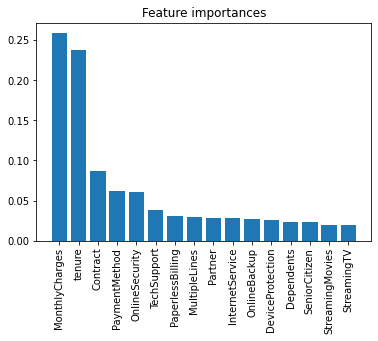

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [ ]:
importances2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_})
importances2 = importances2.sort_values('Importance', ascending=False)
print(importances2)

             Feature  Importance
15    MonthlyCharges    0.258639
3             tenure    0.238381
12          Contract    0.086526
14     PaymentMethod    0.061555
6     OnlineSecurity    0.061162
9        TechSupport    0.037986
13  PaperlessBilling    0.030246
4      MultipleLines    0.028804
1            Partner    0.028668
5    InternetService    0.028124
7       OnlineBackup    0.027399
8   DeviceProtection    0.026214
2         Dependents    0.023469
0      SeniorCitizen    0.023243
11   StreamingMovies    0.020003
10       StreamingTV    0.019580


Confusion matrix

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix=metrics.confusion_matrix(output,y_test)

In [ ]:
confusion_matrix

array([[242,  47],
       [ 22,  42]])

K-Fold


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=100,random_state=42, shuffle=True)

In [ ]:
scores = cross_val_score(clf, X, y, cv=100)
scores
scores.mean()

0.7835533199195172

AUC

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score
# the AUC can be computed by first obtaining the predicted probabilities for each class, and then computing the AUC using these probabilities and the true labels.

0.8487614913176711

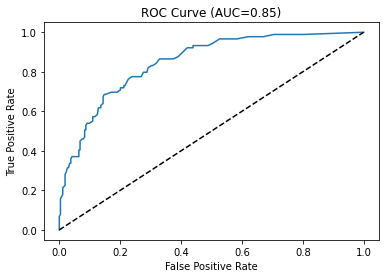

In [ ]:
# compute the FPR, TPR, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC={auc_score:.2f})')
plt.show()